### 데이터 불러오기

In [1]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import re
import plotnine as p9

In [2]:
bulid_permission = pd.read_csv('건축허가현황.csv', index_col=0, encoding='utf-8')
total_value = pd.read_csv('국내건설수주액.csv', index_col=0, encoding='utf-8')
unsold_home = pd.read_csv('미분양주택현황.csv', index_col=0, encoding='utf-8')
apart_price = pd.read_csv('아파트 실거래가격지수.csv', index_col=0, encoding='utf-8')
monthly_rent = pd.read_csv('유형별_주택월세통합가격지수.csv', index_col=0, encoding='utf-8')
licensing = pd.read_csv('주택건설인허가실적.csv', index_col=0, encoding='utf-8')
house_price = pd.read_csv('주택매매가격지수(KB).csv', index_col=0, encoding='utf-8')
house_lease_price = pd.read_csv('주택전세가격지수(KB).csv', index_col=0, encoding='utf-8')
land_value = pd.read_csv('지역별_지가변동률.csv', index_col=0, encoding='utf-8')

### 각 데이터 시각화
#### 건축허가현황

In [3]:
bulid_permission.head()

,연면적-철근·철골조[㎡],연면적-조적조[㎡],연면적-목조[㎡],연면적-기타(자재별)[㎡],연면적-주거용[㎡],연면적-상업용[㎡],연면적-공업용[㎡],연면적-교육및사회용[㎡],연면적-기타(용도별)[㎡],연면적-자재별[㎡],...,동수-조적조[동수],동수-목조[동수],동수-기타(자재별)[동수],동수-주거용[동수],동수-상업용[동수],동수-공업용[동수],동수-교육및사회용[동수],동수-기타(용도별)[동수],동수-자재별[동수],동수-용도별[동수]
2000-08-01,3898712.0,122063.0,5229.0,287185.0,1812355.0,1088979.0,687577.0,0.0,724278.0,4313189.0,...,1216.0,58.0,1078.0,2905.0,2008.0,741.0,0.0,1017.0,6671.0,6671.0
2000-09-01,3055754.0,113586.0,5918.0,236449.0,1273430.0,1014900.0,702592.0,0.0,420785.0,3411707.0,...,1128.0,70.0,793.0,2653.0,1756.0,652.0,0.0,840.0,5901.0,5901.0
2000-10-01,4104565.0,134648.0,8006.0,314620.0,1908535.0,1095874.0,1011477.0,0.0,545953.0,4561839.0,...,1290.0,61.0,1183.0,3246.0,2264.0,874.0,0.0,1120.0,7504.0,7504.0
2000-11-01,4337103.0,108212.0,7727.0,283128.0,2415543.0,1164943.0,613744.0,0.0,541940.0,4736170.0,...,1128.0,62.0,1088.0,2801.0,2050.0,816.0,0.0,1108.0,6775.0,6775.0
2000-12-01,6027008.0,161879.0,26079.0,453178.0,3450325.0,1412322.0,1069299.0,0.0,736198.0,6668144.0,...,941.0,70.0,986.0,2080.0,1619.0,748.0,0.0,1131.0,5578.0,5578.0


<AxesSubplot:>

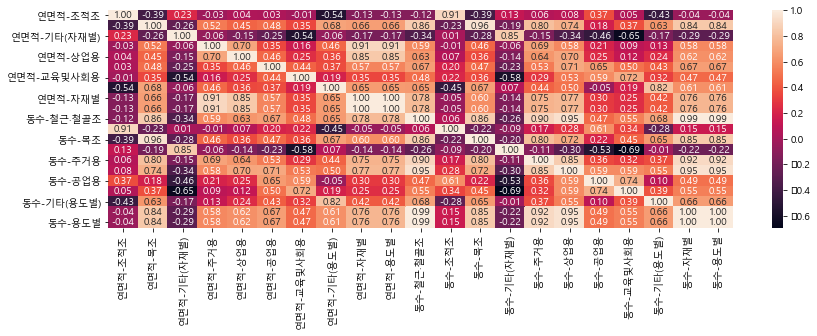

In [28]:
bulid_permission.columns = [re.sub(string = x, pattern = "\[.*\]", repl = "") for x in bulid_permission.columns]
sns.heatmap(bulid_permission.iloc[:, 1:].corr(), annot = True, fmt = ".2f")

In [81]:
# bulid_permission_columns = bulid_permission[['동수-주거용[동수]', '동수-상업용[동수]', '동수-공업용[동수]', '동수-교육및사회용[동수]', '동수-기타(용도별)[동수]']]
bulid_permission_new = bulid_permission.iloc[:,-7:-2]
print(bulid_permission_new)

            동수-주거용  동수-상업용  동수-공업용  동수-교육및사회용  동수-기타(용도별)
2000-08-01  2905.0  2008.0   741.0        0.0      1017.0
2000-09-01  2653.0  1756.0   652.0        0.0       840.0
2000-10-01  3246.0  2264.0   874.0        0.0      1120.0
2000-11-01  2801.0  2050.0   816.0        0.0      1108.0
2000-12-01  2080.0  1619.0   748.0        0.0      1131.0
...            ...     ...     ...        ...         ...
2020-10-01  6004.0  4295.0  1201.0      531.0      4049.0
2020-11-01  6010.0  4541.0  1315.0      501.0      4342.0
2020-12-01  5419.0  4057.0  1188.0      583.0      3555.0
2021-01-01  3430.0  2835.0   805.0      434.0      2803.0
2021-02-01  4021.0  3184.0   911.0      287.0      2770.0

[247 rows x 5 columns]


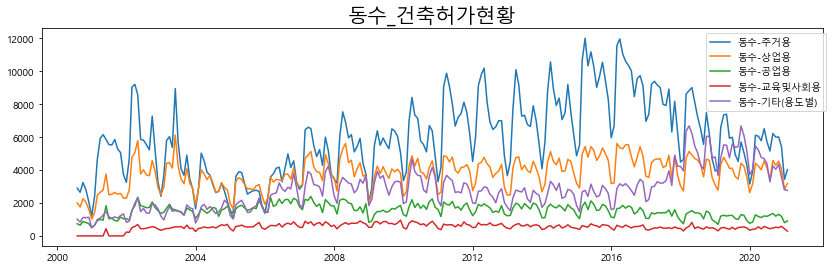

In [85]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(bulid_permission_new.index)
plt.plot(index, bulid_permission_new.values)
plt.legend(bulid_permission_new, bbox_to_anchor=(1.01, 1))
plt.title('동수_건축허가현황', fontsize=20)
plt.show()

- 동수 별 주거용, 상업용, 공업용, 교육 및 사회용, 기타로 나눠 보았다.
- 2016년까지 주거용은 증가하다가 이후로 2020년까지 감소하는 추세이다.

#### 국내건설수주액

In [4]:
total_value.head()

,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],국내외국기관[백만원],...,도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,NaN,...,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,NaN,...,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN
1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,669.0,...,3779.0,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN
1976-04-01,45920.0,25729.0,11859.0,6088.0,6693.0,1089.0,20161.0,4498.0,15663.0,30.0,...,2887.0,3989.0,801.0,1584.0,340.0,1289.0,1.0,6694.0,1252.0,NaN
1976-05-01,48992.0,43014.0,23978.0,10847.0,6969.0,1220.0,5775.0,2578.0,3197.0,203.0,...,8691.0,9655.0,647.0,7414.0,485.0,875.0,168.0,598.0,1579.0,NaN


- 상하수도, 발전, 토지 조성이 증가함에 따라 부동산 가치도 높아짐을 예측할 수 있을 것 같다. => 확인해보기

#### 미분양주택현황

In [5]:
unsold_home.head()

,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
2007-01-01,75616.0,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,3604.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,4544.0,NaN
2007-02-01,73619.0,590.0,8653.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5948.0,11563.0,96.0,4263.0,NaN
2007-03-01,73162.0,687.0,8548.0,9189.0,266.0,5905.0,1048.0,1687.0,2579.0,5801.0,2565.0,7446.0,5184.0,4887.0,5854.0,11328.0,188.0,3532.0,NaN
2007-04-01,73393.0,685.0,8074.0,9009.0,219.0,5829.0,1020.0,1521.0,2488.0,5460.0,3632.0,8250.0,4812.0,4664.0,5419.0,12149.0,162.0,3392.0,NaN
2007-05-01,78571.0,704.0,7964.0,10888.0,362.0,7842.0,957.0,1500.0,2488.0,5212.0,4012.0,9195.0,4625.0,4640.0,6303.0,11723.0,156.0,3554.0,NaN


In [6]:
unsold_home.isnull().sum()

전국[호]      0
서울[호]      0
부산[호]      0
대구[호]      0
인천[호]      0
광주[호]      0
대전[호]      0
울산[호]      0
경기[호]      0
강원[호]      0
충북[호]      0
충남[호]      0
전북[호]      0
전남[호]      0
경북[호]      0
경남[호]      0
제주[호]      0
수도권[호]     0
세종[호]     66
dtype: int64

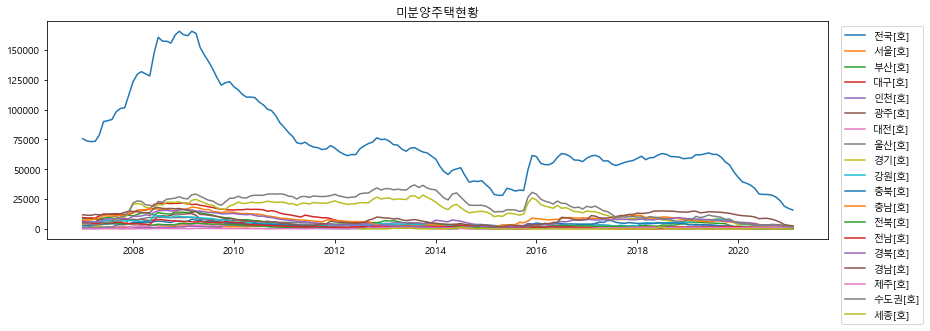

In [7]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(unsold_home.index)
plt.plot(index, unsold_home.values)
plt.legend(unsold_home, bbox_to_anchor=(1.01, 1))
plt.title('미분양주택현황')
plt.show()

- 미분양 주택현황을 보면 2008~2010년 전국적으로 큰 폭을 보였으나 무슨 이유인지 밝히면 될 것 같다.
- 전국적으로 2020년 이후 미분양 주택이 최소치를 나타낸다. 

#### 아파트 실거래가격지수

In [3]:
apart_price.head()

,도심권[2017.11=100],동북권[2017.11=100],동남권[2017.11=100],부산[2017.11=100],대구[2017.11=100],인천[2017.11=100],광주[2017.11=100],대전[2017.11=100],울산[2017.11=100],세종[2017.11=100],...,경북[2017.11=100],경남[2017.11=100],제주[2017.11=100],광역시[2017.11=100],지방광역시[2017.11=100],지방도[2017.11=100],전국[2017.11=100],서울[2017.11=100],수도권[2017.11=100],지방[2017.11=100]
2006-01-01,59.3,59.0,62.0,49.7,62.5,62.4,54.2,76.1,48.8,69.8,...,66.3,63.0,38.7,NaN,55.8,62.3,62.0,60.6,65.4,59.1
2006-02-01,58.1,59.3,63.8,49.4,62.6,62.8,53.9,75.6,48.9,69.7,...,66.2,62.9,37.6,NaN,55.7,62.6,62.7,61.7,66.6,59.2
2006-03-01,59.5,59.5,66.4,49.1,62.4,63.2,53.8,74.9,49.8,72.9,...,66.3,63.2,35.8,NaN,55.6,62.7,63.3,63.2,67.7,59.2
2006-04-01,59.5,59.7,67.9,48.6,62.3,63.7,53.7,74.2,50.3,69.7,...,66.1,62.8,36.1,NaN,55.4,62.9,63.8,64.1,68.4,59.2
2006-05-01,61.4,59.6,67.1,48.2,62.0,64.1,53.0,73.8,51.6,72.3,...,66.1,62.7,36.5,NaN,55.3,62.9,64.1,64.1,69.0,59.1


In [4]:
apart_price.isnull().sum()

도심권[2017.11=100]        0
동북권[2017.11=100]        0
동남권[2017.11=100]        0
부산[2017.11=100]         0
대구[2017.11=100]         0
인천[2017.11=100]         0
광주[2017.11=100]         0
대전[2017.11=100]         0
울산[2017.11=100]         0
세종[2017.11=100]         0
경기[2017.11=100]         0
강원[2017.11=100]         0
충북[2017.11=100]         0
충남[2017.11=100]         0
서북권[2017.11=100]        0
서남권[2017.11=100]        0
전북[2017.11=100]         0
전남[2017.11=100]         0
경북[2017.11=100]         0
경남[2017.11=100]         0
제주[2017.11=100]         0
광역시[2017.11=100]      181
지방광역시[2017.11=100]      0
지방도[2017.11=100]        0
전국[2017.11=100]         0
서울[2017.11=100]         0
수도권[2017.11=100]        0
지방[2017.11=100]         0
dtype: int64

In [5]:
# 결측값이 많은 광역시는 제거
apart_price = apart_price.drop('광역시[2017.11=100]', axis=1)

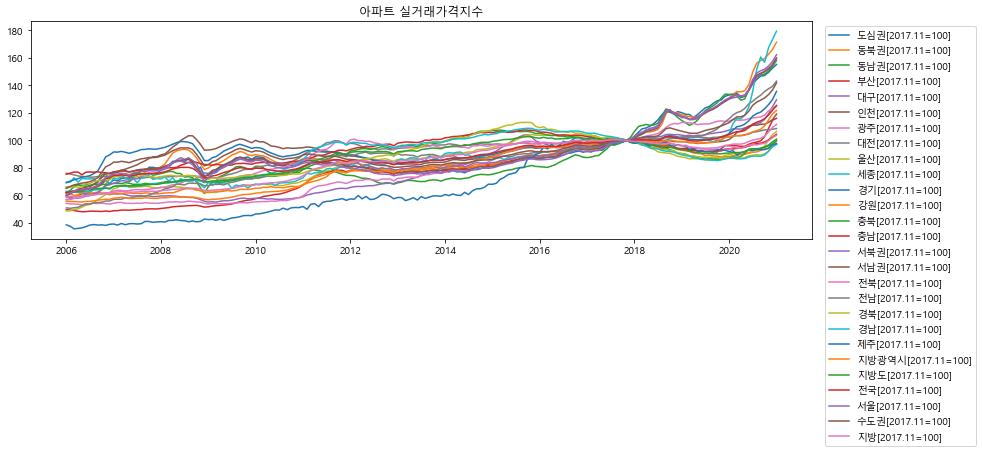

In [30]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(apart_price.index)
plt.plot(index, apart_price.values)
plt.legend(apart_price, bbox_to_anchor=(1.01, 1))
plt.title('아파트 실거래가격지수')
plt.show()

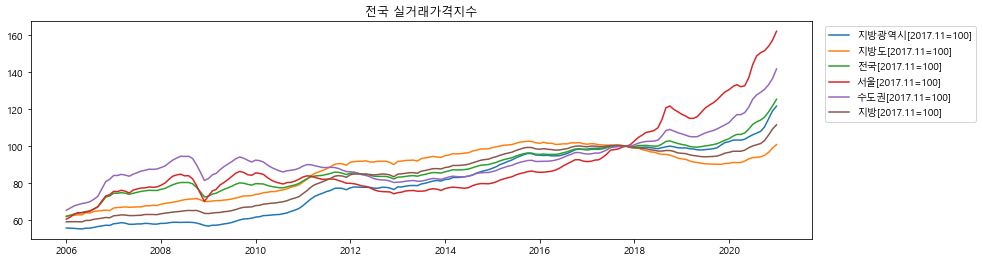

In [90]:
region = apart_price[['지방광역시[2017.11=100]', '지방도[2017.11=100]', '전국[2017.11=100]', '서울[2017.11=100]', '수도권[2017.11=100]', '지방[2017.11=100]']]
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(apart_price.index)
plt.plot(index, region)
plt.legend(region, bbox_to_anchor=(1.01, 1))
plt.title('전국 실거래가격지수')
plt.show()

- 전국 자치도 별로 실거래 가격 지수를 보면 서울이 가장 큰 폭으로 상승했음을 알 수 있다.

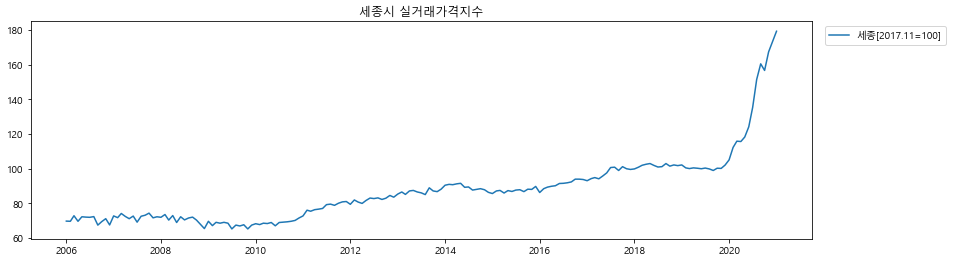

In [92]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(apart_price.index)
data = apart_price[['세종[2017.11=100]']]
plt.plot(index, data)
plt.legend(data, bbox_to_anchor=(1.01, 1))
plt.title('세종시 실거래가격지수')
plt.show()

- 실거래 가격지수는 2017년을 기준으로 파악한 자료이다. 지역별로 봤을때 2020년 전후로 세종 지역의 실거래 가격 지수가 급격히 증가했다.

#### 유형별_주택월세통합가격지수

In [12]:
monthly_rent.head()

,종합-전국[2017.11=100],종합-수도권[2017.11=100],종합-지방[2017.11=100],종합-5대광역시[2017.11=100],종합-8개도[2017.11=100],종합-서울[2017.11=100],종합-경기[2017.11=100],종합-인천[2017.11=100],종합-부산[2017.11=100],종합-대구[2017.11=100],...,단독주택-강원[2017.11=100],단독주택-충북[2017.11=100],단독주택-충남[2017.11=100],단독주택-전북[2017.11=100],단독주택-전남[2017.11=100],단독주택-경북[2017.11=100],단독주택-경남[2017.11=100],단독주택-제주[2017.11=100],단독주택-6대광역시[2017.11=100],단독주택-9개도[2017.11=100]
2015-06-01,100.2,99.6,100.8,100.3,101.0,99.9,99.4,99.1,99.7,100.6,...,100.1,101.6,99.4,99.3,100.3,100.2,100.8,98.1,100.2,100.1
2015-07-01,100.2,99.6,100.8,100.4,101.0,99.9,99.5,99.2,99.7,100.8,...,100.1,101.6,99.4,99.3,100.4,100.3,100.8,98.2,100.3,100.2
2015-08-01,100.3,99.6,100.9,100.4,101.0,99.9,99.5,99.2,99.7,101.0,...,100.1,101.5,99.6,99.3,100.4,100.3,100.8,98.3,100.4,100.2
2015-09-01,100.3,99.7,100.9,100.4,101.1,100.0,99.6,99.2,99.7,101.1,...,100.1,101.5,99.6,99.4,100.3,100.4,100.8,98.3,100.4,100.2
2015-10-01,100.4,99.8,101.0,100.5,101.2,100.1,99.6,99.3,99.8,101.2,...,100.2,101.3,99.7,99.3,100.4,100.4,100.9,98.4,100.4,100.2


In [13]:
monthly_rent.isnull().sum()

종합-전국[2017.11=100]         0
종합-수도권[2017.11=100]        0
종합-지방[2017.11=100]         0
종합-5대광역시[2017.11=100]      0
종합-8개도[2017.11=100]        0
                          ..
단독주택-경북[2017.11=100]       0
단독주택-경남[2017.11=100]       0
단독주택-제주[2017.11=100]       0
단독주택-6대광역시[2017.11=100]    0
단독주택-9개도[2017.11=100]      0
Length: 96, dtype: int64

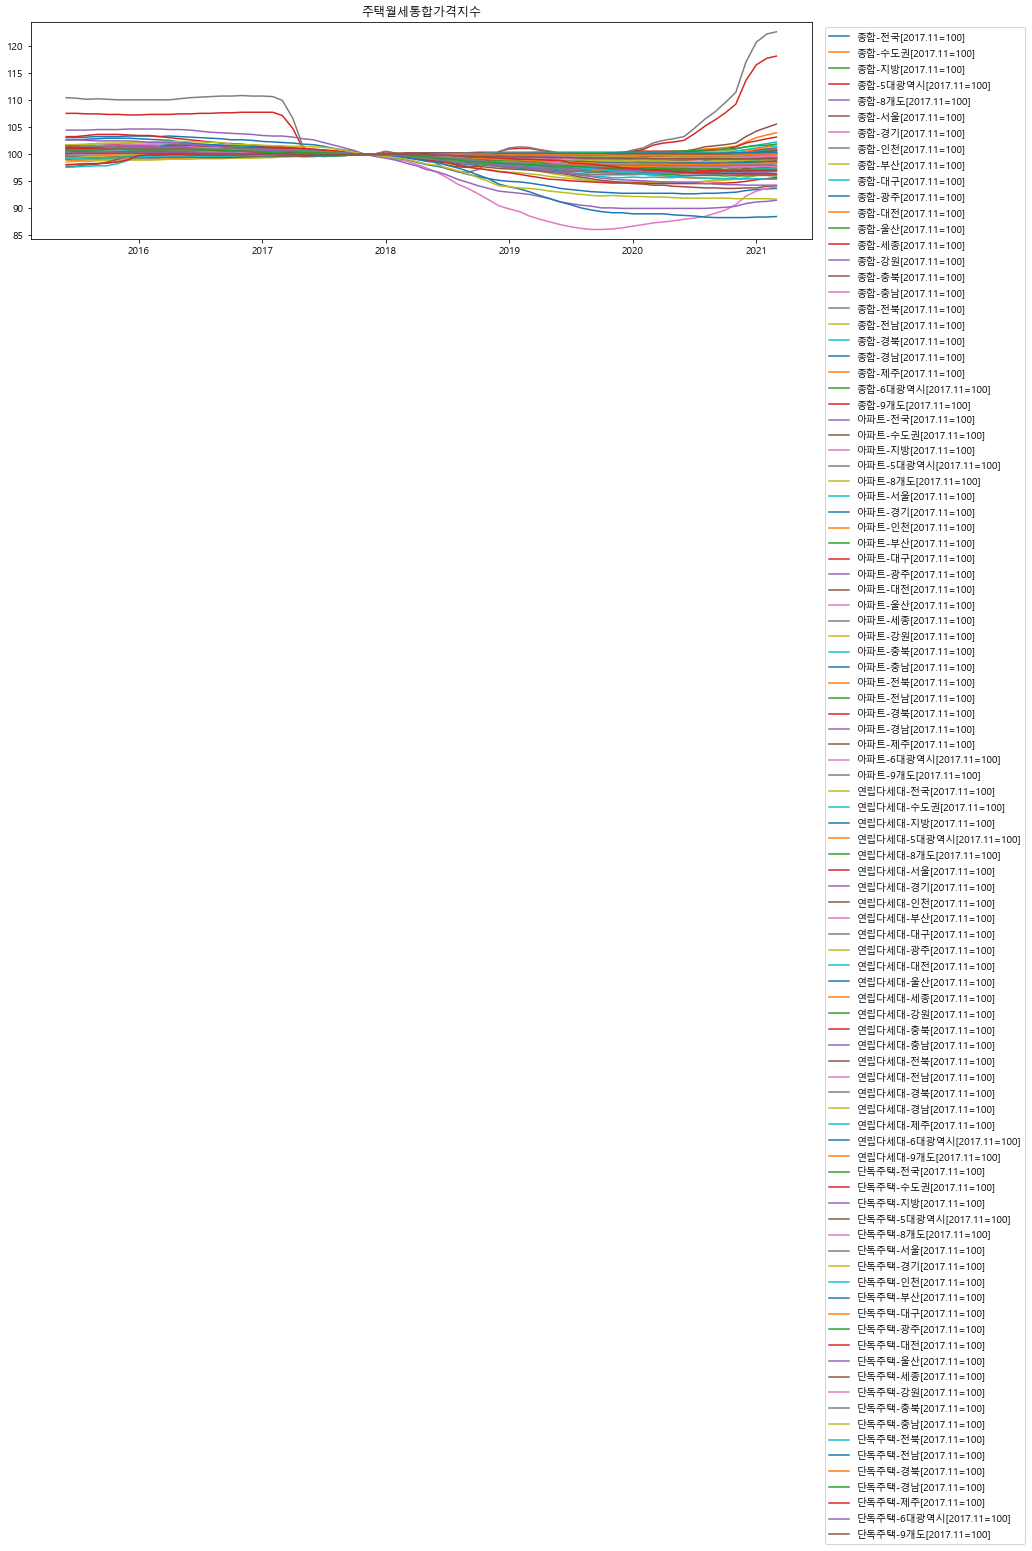

In [14]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(monthly_rent.index)
plt.plot(index, monthly_rent.values)
plt.legend(monthly_rent, bbox_to_anchor=(1.01, 1))
plt.title('주택월세통합가격지수')
plt.show()

- 2018년 이후 서서히 감소하는 추세를 보였지만 2020년 이후 아파트 월세가 가장 큰 폭으로 증가되었다. 

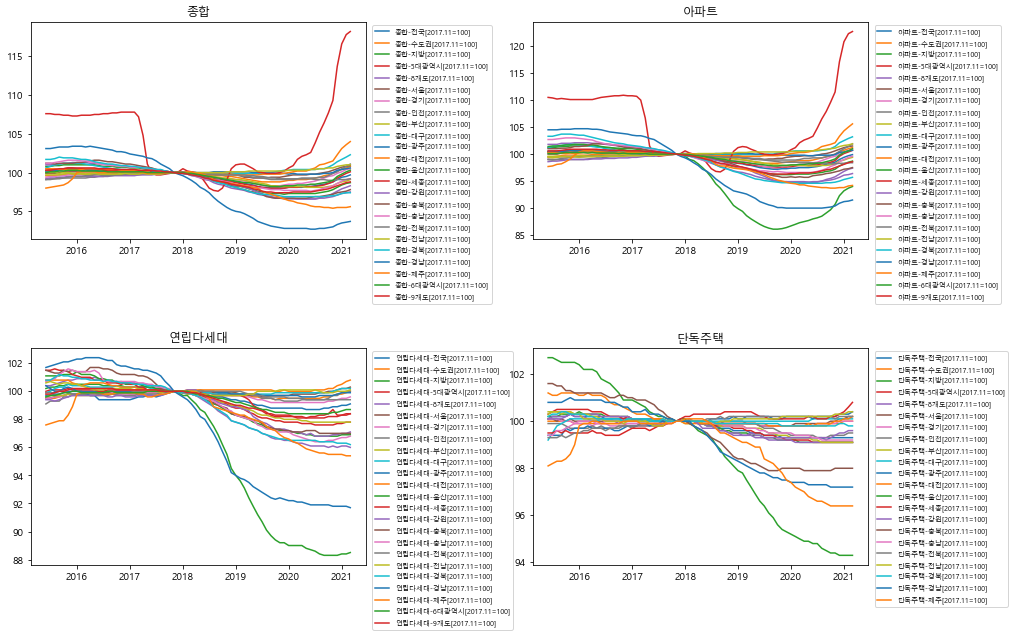

In [126]:
f,ax=plt.subplots(2, 2, figsize=(15,10))
total = monthly_rent.iloc[:, 0:24]
apart = monthly_rent.iloc[:, 24:48]
complex_apart = monthly_rent.iloc[:, 48:72]
personal_apart = monthly_rent.iloc[:, 72:94]

plt.rc('font', family='Malgun Gothic')
# plt.rcParams["figure.figsize"] = (12,5)
index = pd.to_datetime(monthly_rent.index)

plt.subplot(221)
plt.plot(index, total)
plt.legend(total, bbox_to_anchor=(1.01, 1), fontsize=7)
plt.title('종합')

plt.subplot(222)
plt.plot(index, apart)
plt.legend(apart, bbox_to_anchor=(1.01, 1), fontsize=7)
plt.title('아파트')

plt.subplot(223)
plt.plot(index, complex_apart)
plt.legend(complex_apart, bbox_to_anchor=(1.01, 1), fontsize=7)
plt.title('연립다세대')

plt.subplot(224)
plt.plot(index, personal_apart)
plt.legend(personal_apart, bbox_to_anchor=(1.01, 1), fontsize=7)
plt.title('단독주택')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

- 전체적으로 월세가 증가함을 보였으나 아파트의 경우 수도권을 중심으로 증가했고 지방 지역은 감소함을 보였다. 
- 연립다세대 주택이나 단독주택의 경우 다른 지역에 비해 지방은 큰 폭으로 감소했다.

#### 주택건설인허가실적

In [15]:
licensing.head()

,전국[호],부산[호],충북[호],충남[호],대구[호],대전[호],강원[호],광주[호],경기[호],인천[호],...,전북[호],전남[호],경북[호],경남[호],민간부문[호],공공부문[호],부문별[호],세종[호],서울[호],울산[호]
2007-01-01,12038.0,455.0,188.0,1004.0,818.0,55.0,452.0,1022.0,2647.0,69.0,...,888.0,206.0,698.0,1691.0,11718.0,320.0,12038.0,NaN,1530.0,183.0
2007-02-01,29789.0,1554.0,493.0,2310.0,3549.0,89.0,642.0,2200.0,5517.0,185.0,...,1490.0,700.0,2942.0,4206.0,28311.0,1478.0,29789.0,NaN,2324.0,1356.0
2007-03-01,49827.0,3675.0,1187.0,4200.0,4596.0,154.0,1031.0,3547.0,8705.0,1115.0,...,2153.0,1091.0,5256.0,6527.0,48285.0,1542.0,49827.0,NaN,4212.0,2041.0
2007-04-01,69013.0,4039.0,1651.0,4901.0,5110.0,235.0,2185.0,3773.0,12692.0,4452.0,...,2627.0,2310.0,6480.0,7576.0,67439.0,1574.0,69013.0,NaN,6175.0,4322.0
2007-05-01,100210.0,4936.0,2331.0,7988.0,5685.0,746.0,2698.0,5844.0,25860.0,4663.0,...,3542.0,2663.0,7330.0,12754.0,96172.0,4038.0,100210.0,NaN,8041.0,4566.0


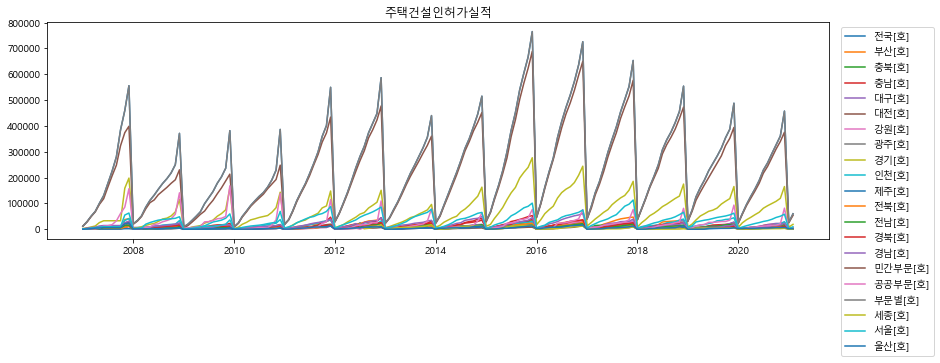

In [16]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(licensing.index)
plt.plot(index, licensing.values)
plt.legend(licensing, bbox_to_anchor=(1.01, 1))
plt.title('주택건설인허가실적')
plt.show()

- 연초에 비해 연말의 주택 건설 인허가 실적이 급격히 증가함을 알 수 있다.

#### 주택매매가격지수

In [17]:
house_price.head()

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
1986-02-01,34.656,61.347,42.925,20.973,17.183,30.044
1986-03-01,34.708,61.513,42.733,20.935,17.153,30.002
1986-04-01,34.449,61.097,42.733,20.819,17.034,29.837
1986-05-01,34.293,60.848,41.837,20.664,16.945,29.588


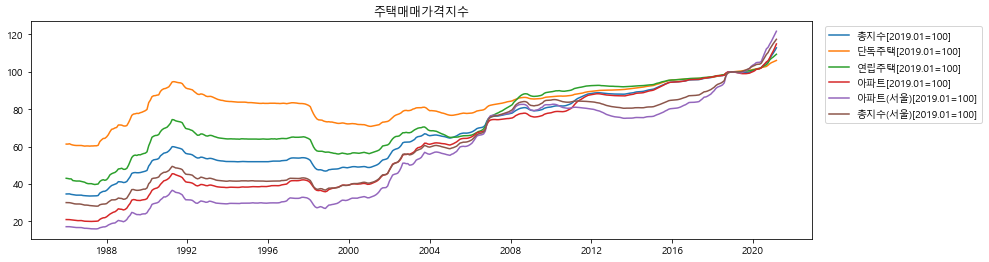

In [18]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(house_price.index)
plt.plot(index, house_price.values)
plt.legend(house_price, bbox_to_anchor=(1.01, 1))
plt.title('주택매매가격지수')
plt.show()

- 서울의 아파트 매매 가격이 2002년 급격히 증가했고 2008~2017년까지 큰 변동없이 유지되는듯 싶었으나 2020년 직후부터 급격히 상승했다. 
- 1900년대부터 2000년 초반을 보면 서울의 아파트 가격이 제일 낮았지만 2007년을 기점으로 아파트 가격이 상승했고 2020년 가장 높은 추세를 보인다. 
- 아파트 가격이 낮았던 2012~2017년 연립주택, 단독주택에 비해 서울 아파트 가격 상승률이 낮은 편이다. 

#### 주택전세가격지수

In [19]:
house_lease_price.head()

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066
1986-03-01,18.273,36.553,18.823,11.446,10.550,17.573
1986-04-01,18.651,37.151,19.158,11.695,10.787,18.002
1986-05-01,18.693,37.151,19.301,11.726,10.875,18.040


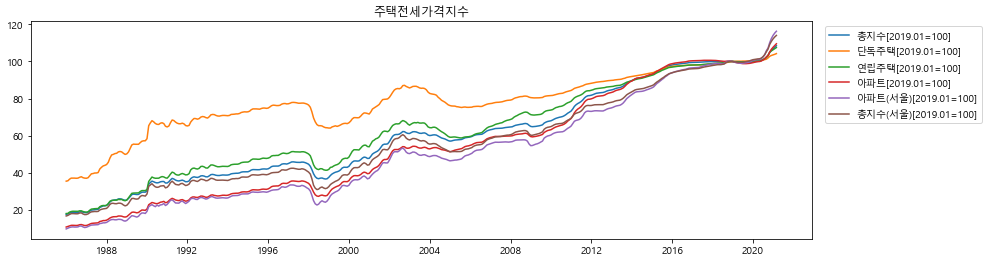

In [20]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(house_lease_price.index)
plt.plot(index, house_lease_price.values)
plt.legend(house_lease_price, bbox_to_anchor=(1.01, 1))
plt.title('주택전세가격지수')
plt.show()

- 주택 매매 가격 지수와 전세 가격은 비슷한 추세이다.
- 다만 2010년대에는 아파트 매매가 보다 전세가 상승 폭이 더 컸다.

#### 지역별_지가변동률

In [21]:
land_value.head()

,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
2005-01-01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
2005-02-01,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,NaN,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.160,0.111
2005-03-01,0.348,0.403,0.119,0.278,0.470,0.154,0.674,0.180,NaN,0.324,0.257,0.227,1.154,0.085,0.139,0.161,0.225,0.102
2005-04-01,0.525,0.725,0.151,0.258,0.751,0.159,0.917,0.149,NaN,0.591,0.221,0.358,0.804,0.071,0.127,0.209,0.291,0.181
2005-05-01,0.562,0.590,0.185,0.254,0.693,0.291,0.850,0.131,NaN,0.882,0.229,0.476,0.883,0.094,0.152,0.224,0.310,0.247


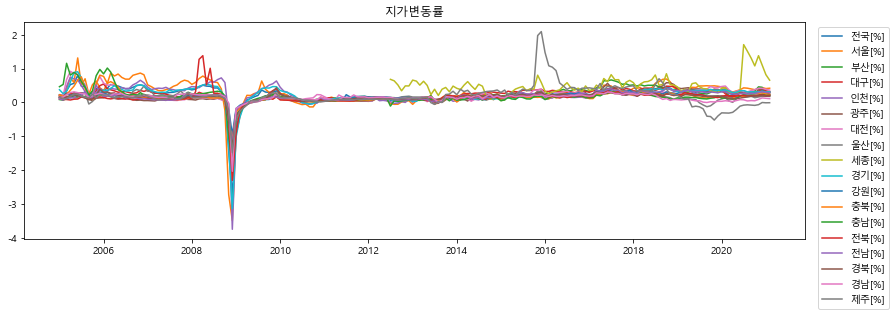

In [22]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(land_value.index)
plt.plot(index, land_value.values)
plt.legend(land_value, bbox_to_anchor=(1.01, 1))
plt.title('지가변동률')
plt.show()

### 서울 아파트 전세, 매매 현황

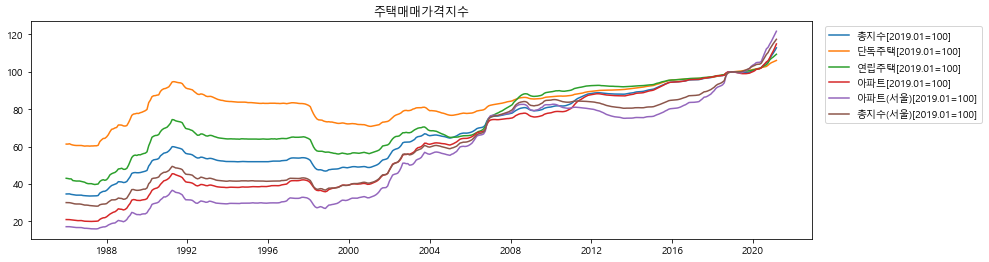

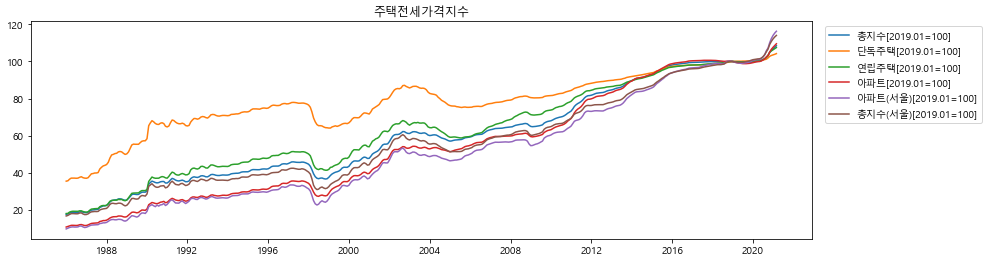

In [7]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(house_price.index)
plt.plot(index, house_price.values)
plt.legend(house_price, bbox_to_anchor=(1.01, 1))
plt.title('주택매매가격지수')
plt.show()

plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
index = pd.to_datetime(house_lease_price.index)
plt.plot(index, house_lease_price.values)
plt.legend(house_lease_price, bbox_to_anchor=(1.01, 1))
plt.title('주택전세가격지수')
plt.show()

- 대통령 임기에 따른 서울 아파트 전세, 매매 현황

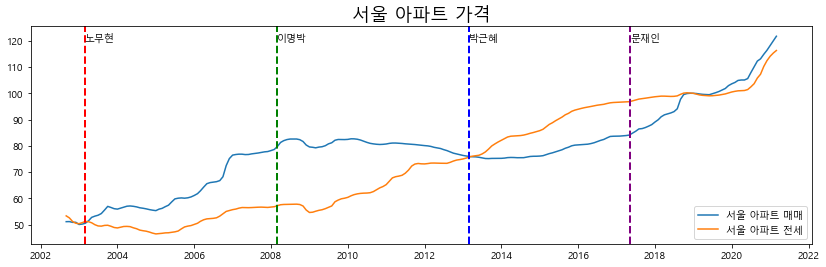

In [8]:
house_price_seoul = house_price.iloc[200:, 4:5]
index = pd.to_datetime(house_price_seoul.index)

house_lease_price_seoul = house_lease_price.iloc[200:, 4:5]
index = pd.to_datetime(house_lease_price_seoul.index)

plt.plot(index, house_price_seoul)
plt.plot(index, house_lease_price_seoul)
plt.legend(['서울 아파트 매매', '서울 아파트 전세'])
plt.title('서울 아파트 가격', fontsize=18)

plt.axvline(datetime.date(2003, 2, 25), color='r', linestyle='--', linewidth=2)
plt.text(datetime.date(2003, 2, 25), 120, '노무현')
plt.axvline(datetime.date(2008, 2, 25), color='g', linestyle='--', linewidth=2)
plt.text(datetime.date(2008, 2, 25), 120, '이명박')
plt.axvline(datetime.date(2013, 2, 25), color='b', linestyle='--', linewidth=2)
plt.text(datetime.date(2013, 2, 25), 120, '박근혜')
plt.axvline(datetime.date(2017, 5, 10), color='purple', linestyle='--', linewidth=2)
plt.text(datetime.date(2017, 5, 10), 120, '문재인')


plt.show()


- 2003년 부터 현시점까지 대통령에 따른 서울 아파트 매매, 전세 상승율을 비교했다. 
- 서울 아파트 전세가격은 이명박 대통령 시절부터 서서히 증가하여 잠시 안정세를 보이나 싶었지만 2020년 이후 급증했다.
- 서울 아파트 매매가격은 노무현 대통령 시절 서서히 오르다가 이명박, 박근혜 대통령을 거치며 안정세를 보였으나 전세 가격과 마찬가지로 2020년 이후 급증했다.